<a href="https://colab.research.google.com/github/SiolaMorningstar/Walmart-Retail-Sales-Forecasting/blob/main/Walmart_Retail_Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##📌 Business Problem

Retail businesses often experience strong seasonal demand fluctuations, especially during major holiday periods. Walmart’s weekly sales data (2010–2012) exhibits significant spikes toward the end of each year, followed by sharp declines in January.

The core objective of this project is:

1. To forecast weekly retail sales using classical and modern time series models.

2. To quantify the strength of seasonal patterns.

3. To evaluate the impact of macroeconomic variables on sales.

4. To explore strategic opportunities for improving off-season revenue performance.

Beyond prediction accuracy, this project aims to translate forecasting results into actionable business insights.

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Walmart_Sales.csv')

df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## 📊 Data Understanding

The dataset contains weekly sales data from February 2010 to October 2012, including:

* Weekly_Sales – Total sales per store

* Date – Weekly timestamp

* Temperature – Weekly average temperature

* Fuel_Price – Fuel price per week

* CPI – Consumer Price Index

* Unemployment – Unemployment rate

* Holiday_Flag – Indicator for major holidays

Key Characteristics:

* Data is weekly (seasonal period ≈ 52 weeks)

* Strong holiday-related sales spikes

* Includes macroeconomic indicators for external driver analysis

Covers ~3 years, allowing seasonal pattern learning

For forecasting, weekly sales were aggregated to create a single time series representing total retail demand.

# 🔍 Exploratory Data Analysis

EDA revealed several critical insights:

* Strong Year-End Seasonality
Significant spikes observed in November–December (Thanksgiving, Black Friday, Christmas).

* Post-Holiday Contraction
Sharp drop in sales during January.

* Stable Mid-Year Performance
Sales remain relatively stable between February and September.

Correlation Insights

* High correlation between Fuel Price and CPI.

* Weak direct correlation between macro variables and Weekly Sales.

* Sales spikes not directly explained by macroeconomic indicators.

The decomposition analysis confirmed that sales variation is primarily driven by recurring seasonal effects rather than structural trend shifts.

In [87]:
print("Shape of the dataset :", df.shape)

print("Columns of dataset: ", df.columns)

df.info()

df.isnull().sum()

Shape of the dataset : (6435, 8)
Columns of dataset:  Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [88]:
df["Date"] = pd.to_datetime(df["Date"], format ='%d-%m-%Y')
df.sort_values('Date')

df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [89]:
weekly_sales = df.groupby('Date')['Weekly_Sales'].sum()

weekly_sales.head()

,Weekly_Sales
Date,
2010-02-05,49750740.50
2010-02-12,48336677.63
2010-02-19,48276993.78
2010-02-26,43968571.13
2010-03-05,46871470.30


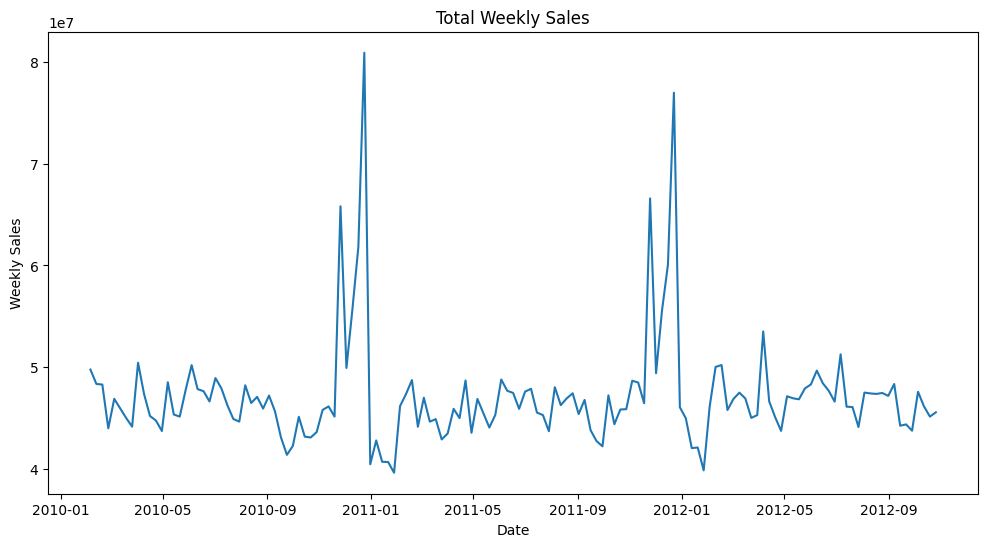

In [90]:
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales.index, weekly_sales.values)
plt.title("Total Weekly Sales")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.show()

# 📈 Baseline and Statistical Forecasting Models

To establish a strong forecasting foundation, multiple classical and statistical time series models were implemented and compared before moving to modern ML-based approaches.

These models include:

* Naïve Forecast

* Moving Average

* Rolling Mean

* ARIMA

* SARIMA

* Holt-Winters (Triple Exponential Smoothing)

## 🔹 1. Naïve & Moving Average Models

These baseline models were used to establish minimum expected performance.

* Naïve Model assumes next week’s sales equal last week’s sales.

* Moving Average / Rolling Mean smooth short-term fluctuations.

📌 Result:

* High error compared to seasonal models.

* Failed to capture strong yearly seasonality.

* Useful only as benchmarking models.

## 🔹 2. ARIMA

ARIMA was implemented after ensuring stationarity through differencing.

Why ARIMA requires stationarity:

* ARIMA models relationships between previous values and errors.

* It assumes constant mean and variance.

* It does not explicitly model seasonality.

📌 Result:

* Moderate performance.

* Unable to fully capture December spikes.

* Underperformed compared to seasonal models.

Conclusion:
ARIMA is not ideal when strong seasonality is present.

# 🔹 3. SARIMA (Seasonal ARIMA)

To address ARIMA’s limitation, SARIMA was implemented.

Model Structure:
SARIMA(p,d,q)(P,D,Q,52)

* Captures both short-term dependencies and yearly seasonal patterns.

* Incorporates seasonal differencing.

📌 Result:

* MAPE ≈ 2.83%

* Produced smooth seasonal forecasts.

* Successfully captured recurring yearly cycles.

However:

* Slightly weaker performance compared to Holt-Winters.

## 🔹 4. Holt-Winters (Triple Exponential Smoothing)

Holt-Winters explicitly models:

* Level

* Trend

* Seasonality

This makes it highly suitable for retail time series with recurring seasonal patterns.

📌 Result:

* MAPE ≈ 1.94% (Best Classical Model)

* Accurately captured December spikes.

* Modeled January drop effectively.

## 🎯 Key Takeaway

The dataset exhibits strong deterministic yearly seasonality.

Models that explicitly model seasonality (Holt-Winters, SARIMA) outperform purely autoregressive models.

Holt-Winters performed best because:

* Seasonal pattern is stable.

* No structural breaks exist.

* Retail demand is cyclic and predictable

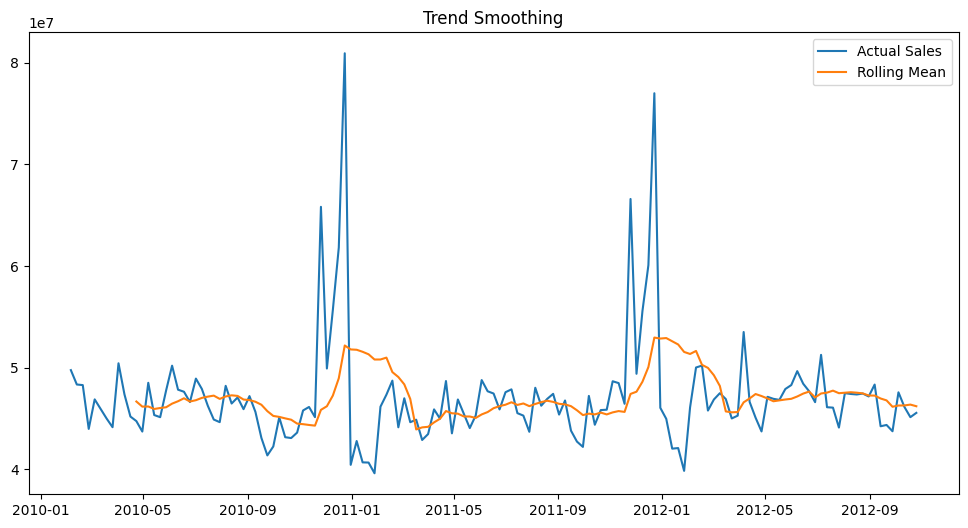

In [91]:
rolling_mean = weekly_sales.rolling(window=12).mean()

plt.figure(figsize=(12,6))
plt.plot(weekly_sales, label = "Actual Sales")
plt.plot(rolling_mean, label = "Rolling Mean")
plt.legend()
plt.title("Trend Smoothing")
plt.show()

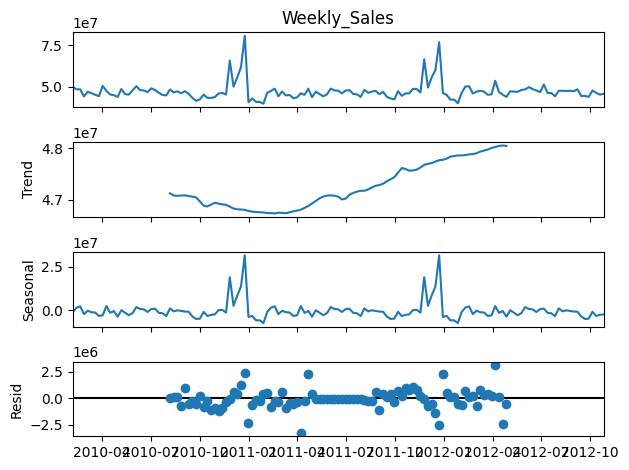

In [92]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(weekly_sales, model = 'additive', period = 52)
result.plot()
plt.show()

In [93]:
train = weekly_sales[:-20]
test = weekly_sales[-20:]

print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (123,)
Test shape: (20,)


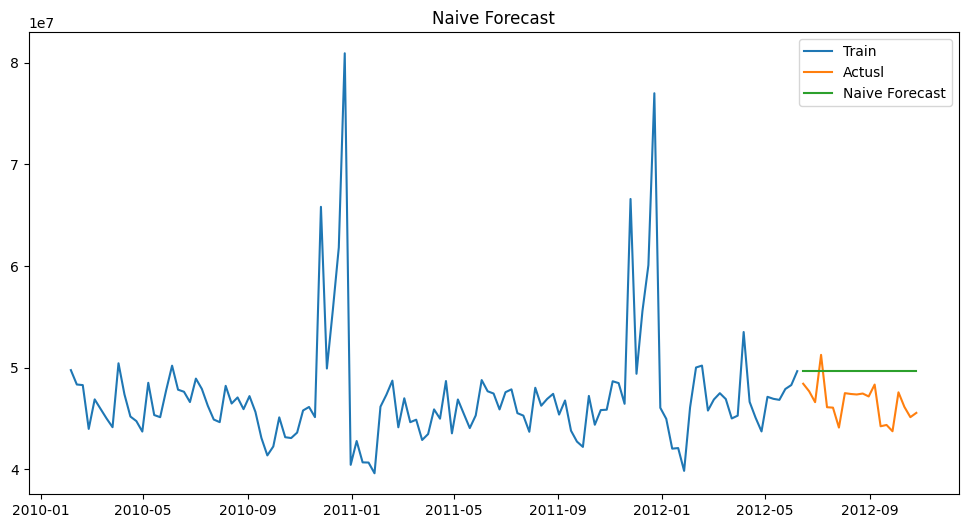

In [94]:
naive_forcast = np.repeat(train.iloc[-1], len(test))

plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actusl')
plt.plot(test.index, naive_forcast, label='Naive Forecast')
plt.legend()
plt.title("Naive Forecast")
plt.show()

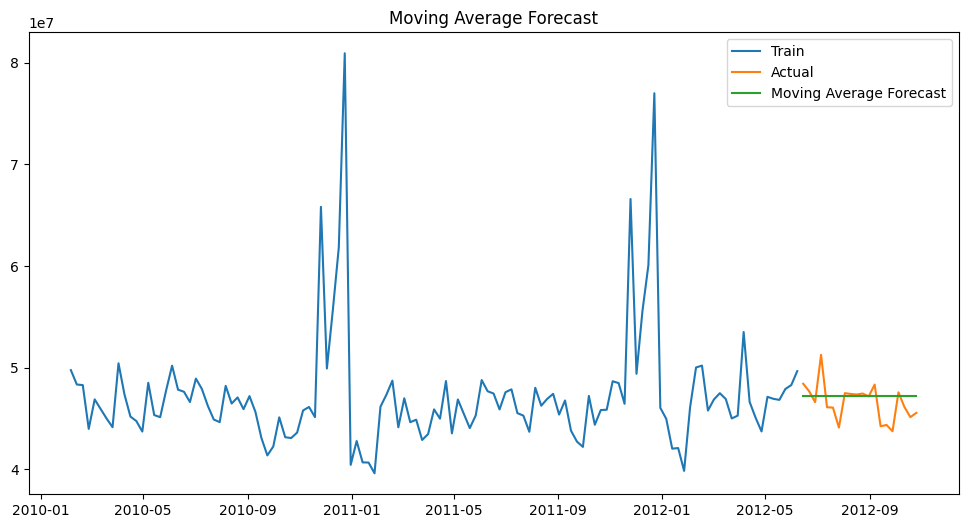

In [95]:
window = 12
moving_avg = train.rolling(window).mean().iloc[-1]

ma_forcast = np.repeat(moving_avg, len(test))

plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, ma_forcast, label = 'Moving Average Forecast')
plt.legend()
plt.title("Moving Average Forecast")
plt.show()

In [96]:
weekly_df = df.groupby('Date').agg({
    'Weekly_Sales': 'sum',
    'Holiday_Flag': 'max',
    'Temperature': 'mean',
    'Fuel_Price': 'mean',
    'CPI': 'mean',
    'Unemployment': 'mean'
}).reset_index()

weekly_df.head()

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,2010-02-05,49750740.50,0,34.037333,2.717844,167.730885,8.619311
1,2010-02-12,48336677.63,1,34.151333,2.694022,167.825608,8.619311
2,2010-02-19,48276993.78,0,37.719778,2.672067,167.871686,8.619311
3,2010-02-26,43968571.13,0,39.243556,2.683933,167.909657,8.619311
4,2010-03-05,46871470.30,0,42.917333,2.731200,167.947628,8.619311


In [97]:
corr = weekly_df.drop(columns=['Date']).corr()

corr

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Weekly_Sales,1.000000,0.172683,-0.159160,-0.056722,0.023413,0.003524
Holiday_Flag,0.172683,1.000000,-0.189186,-0.084039,-0.027542,0.042639
Temperature,-0.159160,-0.189186,1.000000,0.205757,0.159457,-0.168460
Fuel_Price,-0.056722,-0.084039,0.205757,1.000000,0.824704,-0.747205
CPI,0.023413,-0.027542,0.159457,0.824704,1.000000,-0.977430
Unemployment,0.003524,0.042639,-0.168460,-0.747205,-0.977430,1.000000


In [98]:
train = weekly_sales[:-20]
test = weekly_sales[-20:]

In [99]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train)

print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -5.477673545845658
p-value: 2.32193229353823e-06


In [100]:
from statsmodels.tsa.arima.model import ARIMA

# Basic ARIMA model (p=1, d=1, q=1)
model_arima = ARIMA(train, order=(1,1,1))
model_arima_fit = model_arima.fit()

# Forecast
arima_forecast = model_arima_fit.forecast(steps=len(test))

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


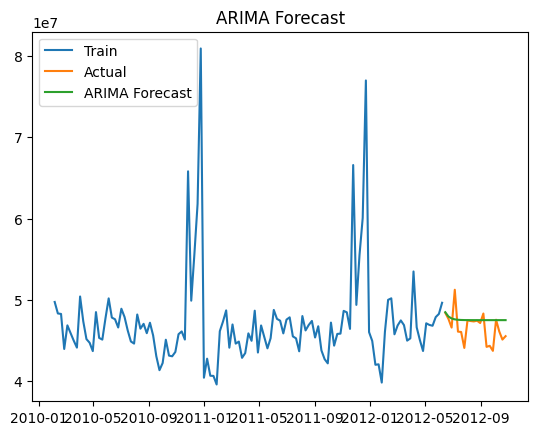

In [101]:
plt.figure()
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.legend()
plt.title("ARIMA Forecast")
plt.show()

In [102]:
def evaluate(actual, forecast):
    mae = np.mean(np.abs(forecast - actual))
    rmse = np.sqrt(np.mean((forecast - actual)**2))
    mape = np.mean(np.abs((forecast - actual) / actual)) * 100
    return mae, rmse, mape

arima_mae, arima_rmse, arima_mape = evaluate(test, arima_forecast)

print("ARIMA Errors:")
print("MAE:", arima_mae)
print("RMSE:", arima_rmse)
print("MAPE:", arima_mape)

ARIMA Errors:
MAE: 1453816.5401642292
RMSE: 1976658.213847523
MAPE: 3.1808180781767352


In [66]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMA (p,d,q)(P,D,Q,52)
model_sarima = SARIMAX(train,
                       order=(1,1,1),
                       seasonal_order=(1,1,1,52))

model_sarima_fit = model_sarima.fit()

sarima_forecast = model_sarima_fit.forecast(steps=len(test))

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


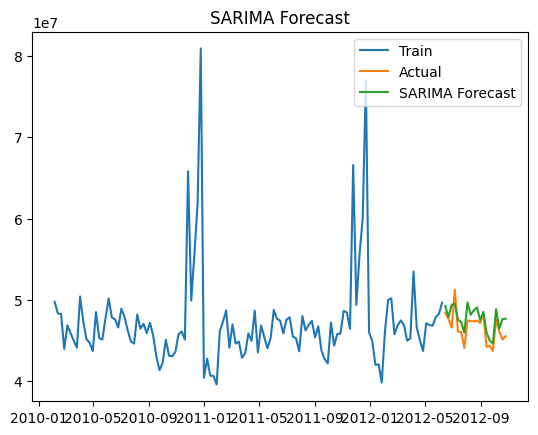

In [67]:
plt.figure()
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast')
plt.legend()
plt.title("SARIMA Forecast")
plt.show()

In [68]:
sarima_mae, sarima_rmse, sarima_mape = evaluate(test, sarima_forecast)

print("SARIMA Errors:")
print("MAE:", sarima_mae)
print("RMSE:", sarima_rmse)
print("MAPE:", sarima_mape)

SARIMA Errors:
MAE: 1310602.9743053732
RMSE: 1512290.9792618998
MAPE: 2.8257403797596123


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


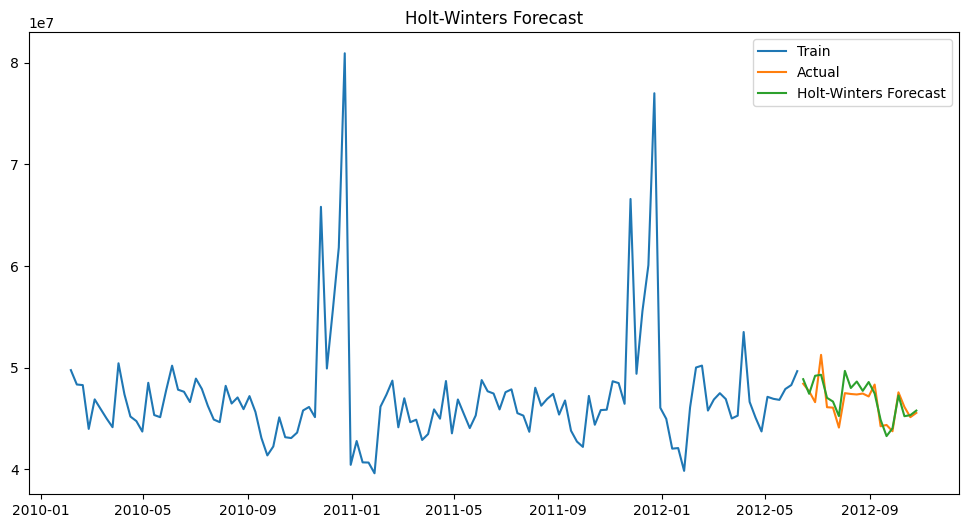

In [69]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Split data
train = weekly_sales[:-20]
test = weekly_sales[-20:]

# Fit Holt-Winters model
hw_model = ExponentialSmoothing(
    train,
    trend='add',
    seasonal='add',
    seasonal_periods=52  # weekly data with yearly seasonality
).fit()

# Forecast
hw_forecast = hw_model.forecast(len(test))

# Plot
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, hw_forecast, label='Holt-Winters Forecast')
plt.legend()
plt.title("Holt-Winters Forecast")
plt.show()

In [70]:
hw_mae, hw_rmse, hw_mape = evaluate(test, hw_forecast)

print("Holt-Winters Errors:")
print("MAE:", hw_mae)
print("RMSE:", hw_rmse)
print("MAPE:", hw_mape)

Holt-Winters Errors:
MAE: 910190.0743553549
RMSE: 1133612.934347611
MAPE: 1.9404560313340746


# 🚀 Prophet (Modern Forecasting Model)

Prophet was implemented to:

* Automatically detect trend changepoints

* Model yearly seasonality using Fourier terms

* Provide uncertainty intervals

Results:

* MAPE ≈ 2.35%

Component Analysis

Trend:

* Slight long-term growth with no major structural breaks.

Yearly Seasonality:

* Massive December uplift

* Sharp January decline

* Moderate fluctuations during mid-year

Prophet successfully captured systematic seasonal patterns while filtering noise.

In [71]:
from prophet import Prophet
import pandas as pd

# Prepare dataset
prophet_df = weekly_sales.reset_index()
prophet_df.columns = ['ds', 'y']

prophet_df.head()

,ds,y
0,2010-02-05,49750740.50
1,2010-02-12,48336677.63
2,2010-02-19,48276993.78
3,2010-02-26,43968571.13
4,2010-03-05,46871470.30


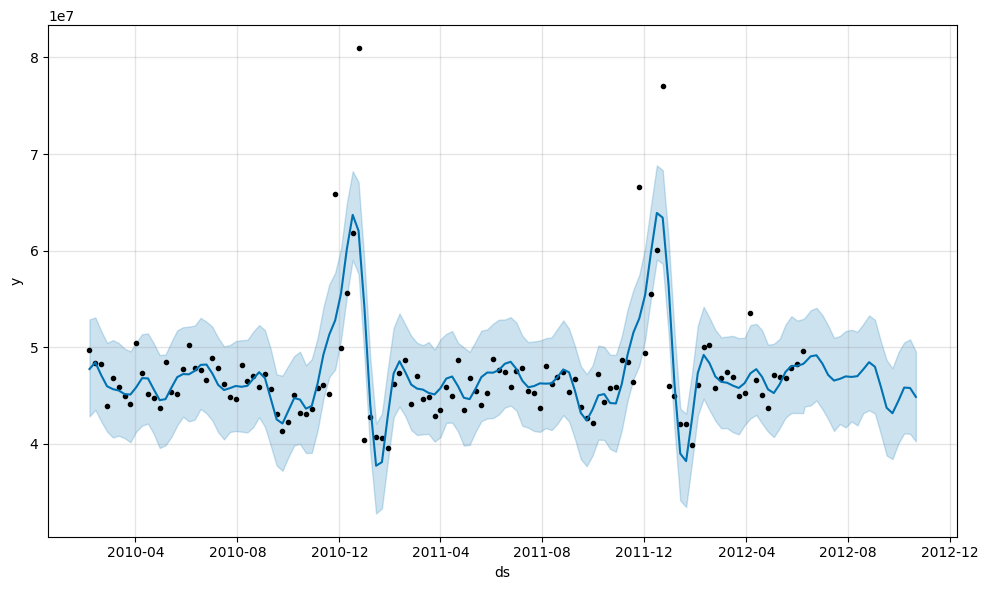

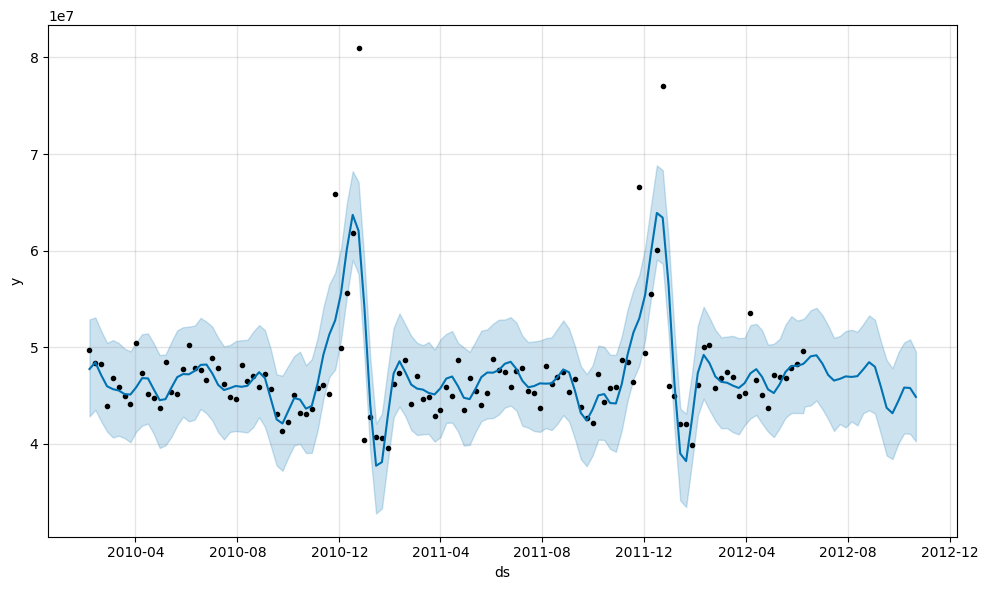

In [72]:
# Train-test split
train_prophet = prophet_df[:-20]
test_prophet = prophet_df[-20:]

# Build model
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False
)

model.fit(train_prophet)

# Create future dataframe
future = model.make_future_dataframe(periods=20, freq='W')

forecast = model.predict(future)

# Plot
model.plot(forecast)

In [73]:
forecast_test = forecast.iloc[-20:]['yhat'].values
actual_test = test_prophet['y'].values

prophet_mae, prophet_rmse, prophet_mape = evaluate(actual_test, forecast_test)

print("Prophet Errors:")
print("MAE:", prophet_mae)
print("RMSE:", prophet_rmse)
print("MAPE:", prophet_mape)

Prophet Errors:
MAE: 1098227.4584535372
RMSE: 1453774.8645957892
MAPE: 2.351534624923083


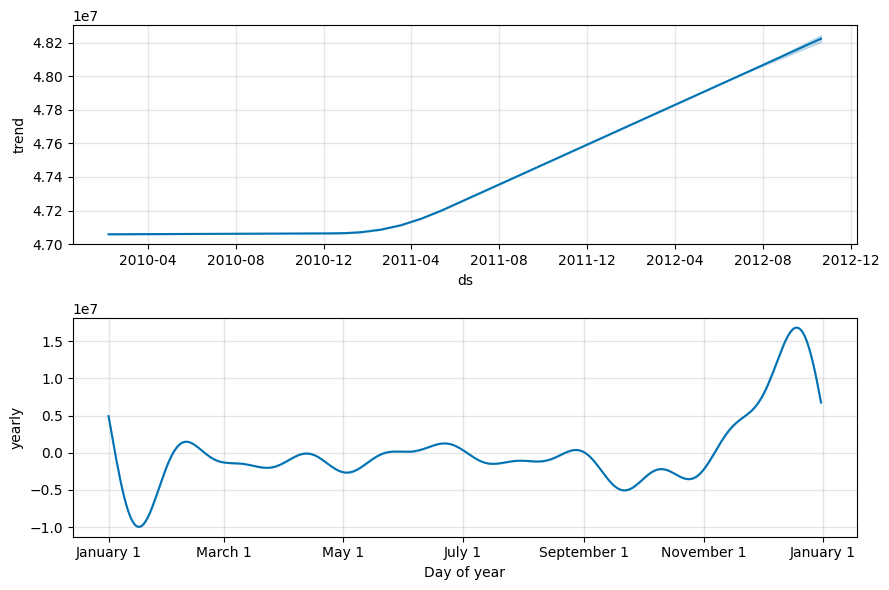

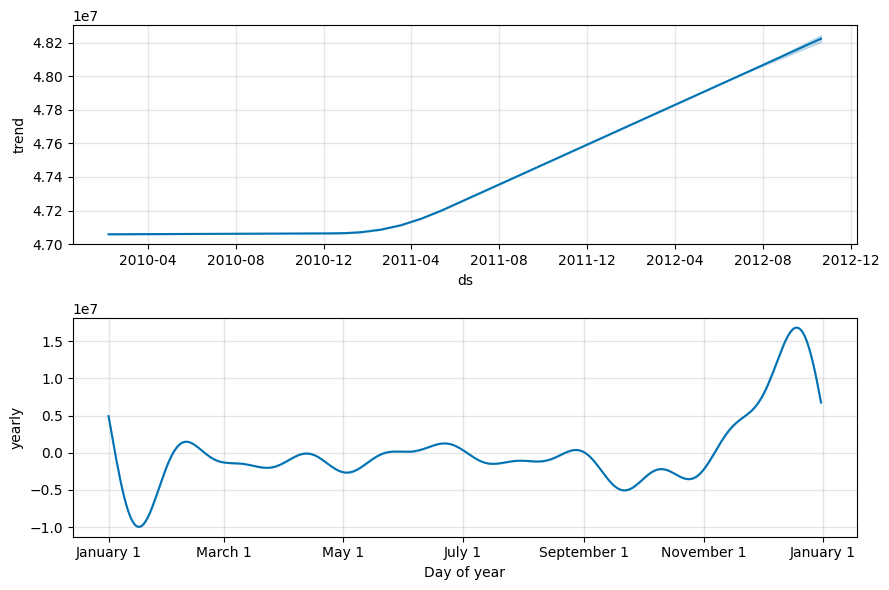

In [74]:
model.plot_components(forecast)

# 🔬 Prophet with Macroeconomic Regressors

External variables added:

* Unemployment

* Fuel Price

* CPI

* Temperature

* Holiday Flag

Results:

* MAPE ≈ 3.38% (performance decreased)

Interpretation

* Macroeconomic variables had weak explanatory power.

* Seasonal effects dominate weekly sales variation.

* Aggregation across stores likely diluted macroeconomic signals.

Conclusion:   
Retail sales during this period were primarily driven by recurring seasonal demand rather than short-term economic fluctuations.

In [75]:
# Aggregate weekly data
weekly_full = df.groupby('Date').agg({
    'Weekly_Sales': 'sum',
    'Unemployment': 'mean',
    'Fuel_Price': 'mean',
    'CPI': 'mean',
    'Temperature': 'mean',
    'Holiday_Flag': 'max'
}).reset_index()

weekly_full.head()

,Date,Weekly_Sales,Unemployment,Fuel_Price,CPI,Temperature,Holiday_Flag
0,2010-02-05,49750740.50,8.619311,2.717844,167.730885,34.037333,0
1,2010-02-12,48336677.63,8.619311,2.694022,167.825608,34.151333,1
2,2010-02-19,48276993.78,8.619311,2.672067,167.871686,37.719778,0
3,2010-02-26,43968571.13,8.619311,2.683933,167.909657,39.243556,0
4,2010-03-05,46871470.30,8.619311,2.731200,167.947628,42.917333,0


In [76]:
prophet_df = weekly_full.rename(columns={
    'Date': 'ds',
    'Weekly_Sales': 'y'
})

prophet_df.head()

,ds,y,Unemployment,Fuel_Price,CPI,Temperature,Holiday_Flag
0,2010-02-05,49750740.50,8.619311,2.717844,167.730885,34.037333,0
1,2010-02-12,48336677.63,8.619311,2.694022,167.825608,34.151333,1
2,2010-02-19,48276993.78,8.619311,2.672067,167.871686,37.719778,0
3,2010-02-26,43968571.13,8.619311,2.683933,167.909657,39.243556,0
4,2010-03-05,46871470.30,8.619311,2.731200,167.947628,42.917333,0


In [77]:
train = prophet_df[:-20]
test = prophet_df[-20:]

In [78]:
model_reg = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False
)

# Add regressors
model_reg.add_regressor('Unemployment')
model_reg.add_regressor('Fuel_Price')
model_reg.add_regressor('CPI')
model_reg.add_regressor('Temperature')
model_reg.add_regressor('Holiday_Flag')

model_reg.fit(train)

In [79]:
future = model_reg.make_future_dataframe(periods=20, freq='W-FRI')

# Merge regressor values
future = future.merge(
    prophet_df[['ds','Unemployment','Fuel_Price','CPI','Temperature','Holiday_Flag']],
    on='ds',
    how='left'
)

forecast_reg = model_reg.predict(future)

In [80]:
forecast_test = forecast_reg.iloc[-20:]['yhat'].values
actual_test = test['y'].values

reg_mae, reg_rmse, reg_mape = evaluate(actual_test, forecast_test)

print("Prophet + Regressors Errors:")
print("MAE:", reg_mae)
print("RMSE:", reg_rmse)
print("MAPE:", reg_mape)

Prophet + Regressors Errors:
MAE: 1575400.9290374604
RMSE: 2074851.9431827723
MAPE: 3.380202039205486


In [81]:
model_reg.params

OrderedDict([('lp__', array([[320.59448]])),
             ('k', array([[-0.13714345]])),
             ('m', array([[0.65096308]])),
             ('delta',
              array([[-1.3413113e-09,  5.5268415e-09,  2.2728476e-08,  9.0053759e-08,
                      -1.4193163e-11, -1.4648087e-08, -1.2683642e-09,  6.2686088e-09,
                      -1.2152497e-09,  1.3047386e-10, -6.9862535e-09, -3.8603137e-09,
                       1.2029173e-09,  6.6048964e-06,  4.5568692e-09, -4.5439467e-09,
                       1.0621329e-08,  9.8471594e-10,  2.3644740e-09,  1.1580397e-08,
                      -1.2870986e-09,  6.8249750e-09, -4.2747055e-09, -1.2271744e-08,
                       5.7711542e-09]])),
             ('sigma_obs', array([[0.04360596]])),
             ('beta',
              array([[ 0.00574736,  0.10191635, -0.03081793,  0.03536336, -0.03289212,
                       0.00653513, -0.04196396, -0.00525164, -0.02530223, -0.00263814,
                      -0.03251814, -0.00

# 📊 Seasonality Strength Analysis

Seasonality strength was quantified as:

Max(Seasonal Component) – Min(Seasonal Component)

Findings:

* December generates substantial positive uplift.

* January produces significant contraction.

* Seasonal amplitude is large relative to average weekly sales.

This confirms:

The business is highly dependent on Q4 revenue concentration.

Such reliance increases risk exposure and revenue volatility.

In [82]:
import pandas as pd

regressor_names = model_reg.extra_regressors.keys()
beta_values = model_reg.params['beta'][0][-len(regressor_names):]

importance_df = pd.DataFrame({
    'Regressor': list(regressor_names),
    'Coefficient': beta_values
})

importance_df.sort_values(by='Coefficient', key=abs, ascending=False)

,Regressor,Coefficient
0,Unemployment,-0.071521
3,Temperature,0.054190
2,CPI,-0.048755
1,Fuel_Price,0.022760
4,Holiday_Flag,0.021129


In [83]:
seasonality = forecast['yearly']

seasonality_strength = seasonality.max() - seasonality.min()

print("Seasonality Strength:", seasonality_strength)

Seasonality Strength: 26111828.659568407


In [84]:
avg_sales = prophet_df['y'].mean()
print("Seasonality % of Avg Sales:", (seasonality_strength / avg_sales) * 100)

Seasonality % of Avg Sales: 55.42333573336936


# 🔮 Off-Season Uplift Simulation

To move beyond forecasting, scenario analysis was conducted.

Simulation Question:

What if off-season (February–September) sales increase by 5%?

Results:

* A 5% uplift during off-season leads to measurable annual revenue growth.

* Reduced dependence on Q4 concentration.

* Improved revenue stability across the year.

This transforms forecasting into a strategic planning tool.

In [85]:
simulation = forecast.copy()

# Identify non-holiday months (example: Feb–Sep)
simulation['month'] = simulation['ds'].dt.month

off_season_mask = simulation['month'].between(2,9)

simulation.loc[off_season_mask, 'yhat'] *= 1.05

uplift = simulation['yhat'].sum() - forecast['yhat'].sum()

print("Total Revenue Uplift from 5% Off-Season Increase:", uplift)

Total Revenue Uplift from 5% Off-Season Increase: 243999510.3947544


# 💡 Key Business Insights

1. Strong Holiday Dependency
Revenue is heavily concentrated in November–December.

2. Post-Holiday Contraction
January experiences consistent demand suppression.

3. Macroeconomic Insensitivity
CPI, Fuel Price, and Unemployment show limited short-term impact on weekly sales.

4. Stable Demand Structure
No major structural trend shifts detected between 2010–2012.

5. Strategic Opportunity
Improving off-season sales by even a small percentage significantly enhances annual stability.

## 🎯 Final Strategic Recommendation

* To improve non-holiday sales, businesses should focus on:

* Targeted promotions during mid-year

* Loyalty programs during low-demand months

* Back-to-school and summer campaigns

* Diversified product strategies

Forecasting alone identifies patterns.
Strategic simulation enables revenue optimization

In [103]:
!pip freeze > requirements.txt

In [105]:
!pip install streamlit
!pip install pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 40.1 MB/s eta 0:00:00
  Attempting uninstall: cachetools
    Found existing installation: cachetools 7.0.1
    Uninstalling cachetools-7.0.1:
      Successfully uninstalled cachetools-7.0.1


In [107]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

st.title("Retail Sales Forecasting Dashboard")

uploaded_file = st.file_uploader("Upload your sales CSV", type=["csv"])

if uploaded_file:

    df = pd.read_csv(uploaded_file)
    df['Date'] = pd.to_datetime(df['Date'])

    weekly = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
    weekly.columns = ['ds', 'y']

    model = Prophet(yearly_seasonality=True)
    model.fit(weekly)

    future = model.make_future_dataframe(periods=20, freq='W')
    forecast = model.predict(future)

    fig1 = model.plot(forecast)
    st.pyplot(fig1)

    st.subheader("Seasonality Components")
    fig2 = model.plot_components(forecast)
    st.pyplot(fig2)

    st.subheader("Off-Season Uplift Simulation")

    uplift_percent = st.slider("Increase Off-Season Sales (%)", 0, 20, 5)

    forecast_sim = forecast.copy()
    forecast_sim['month'] = forecast_sim['ds'].dt.month

    mask = forecast_sim['month'].between(2, 9)
    forecast_sim.loc[mask, 'yhat'] *= (1 + uplift_percent/100)

    uplift_value = forecast_sim['yhat'].sum() - forecast['yhat'].sum()

    st.write("Projected Revenue Uplift:", round(uplift_value, 2))

Writing app.py


In [110]:
from pyngrok import ngrok

public_url = ngrok.connect(port="8501")
print(public_url)

!streamlit run app.py &

ERROR:pyngrok.process.ngrok:t=2026-02-24T19:14:08+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2026-02-24T19:14:08+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2026-02-24T19:14:08+0000 lvl=eror msg="terminating with error" obj=app err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your aut

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.